## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости. Используйте L1 расстояние для расчетов и визуализации.

In [86]:
import pandas as pd
import random
import operator
import matplotlib.pyplot as plt
import numpy as np
import copy

In [70]:
tsp_data = pd.read_csv('./hw9_data/tsp.csv', header=None)
X = tsp_data[1].values
Y = tsp_data[2].values

In [71]:
class City:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city): # L_1 расстояние до города city
        x_dist = abs(self.x - city.x)
        y_dist = abs(self.y - city.y)
        dist = x_dist + y_dist
        return dist
    
    def __repr__(self): # привычное воспроизведение координат нашего города
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

In [72]:
class Fitness:
    
    def __init__(self, route):
        self.route = route # маршрут
        self.distance = 0 # длина маршрута
        self.fitness = 0 # величина, обратная длине маршрута
    
    def route_distance(self):
        if self.distance == 0:
            dist = 0
            for i in range(len(self.route) - 1):
                from_city = self.route[i]
                to_city = self.route[i + 1]
                dist += from_city.distance(to_city)
            self.distance = dist
        return self.distance
    
    def route_fitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.route_distance())
        return self.fitness

In [73]:
def plot_best_path(best_route):
    plt.figure(figsize=(12, 8))
    for i in range(len(best_route)):
        if i < (len(best_route) - 1):
            x1, y1 = [best_route[i].x, best_route[i + 1].x], [best_route[i].y, best_route[i].y]
            x2, y2 = [best_route[i + 1].x, best_route[i + 1].x], [best_route[i].y, best_route[i + 1].y]
            plt.plot(x1, y1, color='red')
            plt.plot(x2, y2, color='red')
        plt.scatter(best_route[0].x, best_route[0].y, color='blue', s=60)
        plt.scatter(best_route[-1].x, best_route[-1].y, color='blue', s=60)
        if i != 0 and i != len(best_route) - 1:
            plt.scatter(best_route[i].x, best_route[i].y, color='black')
    plt.show()

In [74]:
city_list = []
for i in range(len(X)):
    city_list.append(City(x=X[i], y=Y[i]))

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

In [75]:
def create_route(city_list): # создаём произвольный маршрут
    route = random.sample(city_list, len(city_list))
    return route

def create_many_routes(city_list, n):
    routes = []
    for i in range(n):
        routes.append(create_route(city_list))
    return routes

def rank_routes(routes, n): # ранжируем маршруты по величине fitness_route
    fitness_ranking = {}
    for i in range(n):
        fitness_ranking[i] = Fitness(routes[i]).route_fitness()
    return sorted(fitness_ranking.items(), key=operator.itemgetter(1), reverse=True)

def monte_carlo(city_list, num_iterations):
    routes = create_many_routes(city_list, num_iterations)
    ranked_routes = rank_routes(routes, num_iterations)
    best_route_index = ranked_routes[0][0]
    best_route = routes[best_route_index]
    print(f'Лучшее расстояние: {1 / ranked_routes[0][1]}')
    return best_route

In [76]:
best_route = monte_carlo(city_list, 1000)

Лучшее расстояние: 29640.0


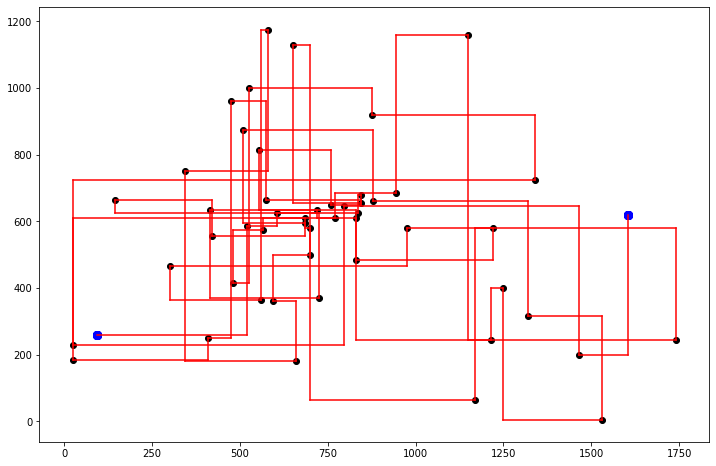

In [77]:
plot_best_path(best_route)

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

In [106]:
def create_route(city_list): # создаём произвольный маршрут
    route = random.sample(city_list, len(city_list))
    return route

def rank_routes(routes, n): # ранжируем маршруты по величине fitness_route
    fitness_ranking = {}
    for i in range(n):
        fitness_ranking[i] = Fitness(routes[i]).route_fitness()
    return sorted(fitness_ranking.items(), key=operator.itemgetter(1), reverse=True)

def get_neighbours(route): # соседи - умножение на инверсию
    neighbours = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbour = copy.deepcopy(route)
            neighbour[i] = route[j]
            neighbour[j] = route[i]
            neighbours.append(neighbour)
    return neighbours

def random_walk(city_list, num_iterations):
    curr_route = create_route(city_list)
    routes = [curr_route]
    for i in range(num_iterations):
        neighbours = get_neighbours(curr_route)
        ix = random.randint(0, len(neighbours) - 1)
        routes.append(neighbours[ix])
        curr_route = neighbours[ix]
    ranked_routes = rank_routes(routes, num_iterations + 1)
    best_route_index = ranked_routes[0][0]
    best_route = routes[best_route_index]
    print(f'Лучшее расстояние: {1 / ranked_routes[0][1]}')
    return best_route

In [108]:
best_route = random_walk(city_list, 100)

Лучшее расстояние: 30740.0


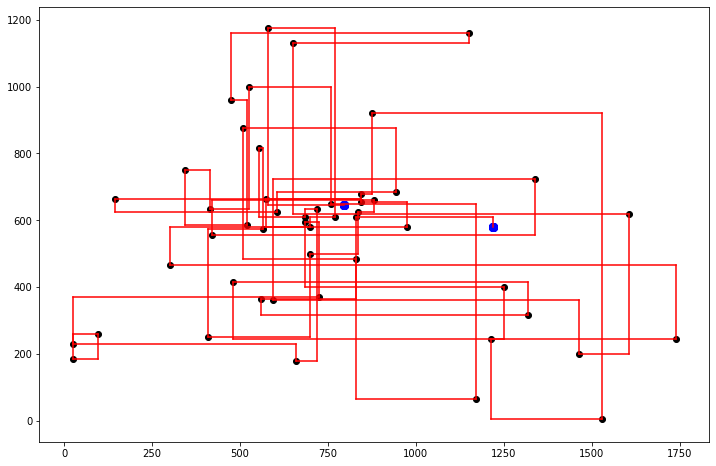

In [109]:
plot_best_path(best_route)

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [194]:
def create_route(city_list): # создаём произвольный маршрут
    route = random.sample(city_list, len(city_list))
    return route

def rank_routes(routes, n): # ранжируем маршруты по величине fitness_route
    fitness_ranking = {}
    for i in range(n):
        fitness_ranking[i] = Fitness(routes[i]).route_fitness()
    return sorted(fitness_ranking.items(), key=operator.itemgetter(1), reverse=True)

def get_neighbours(route): # соседи - умножение на инверсию
    neighbours = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbour = copy.deepcopy(route)
            neighbour[i] = route[j]
            neighbour[j] = route[i]
            neighbours.append(neighbour)
    return neighbours

def hill_climb(city_list, num_iterations):
    curr_route = create_route(city_list)
    routes = [curr_route]
    curr_fitness = Fitness(curr_route).route_fitness()
    for i in range(num_iterations):
        neighbours = get_neighbours(curr_route)
        ranked_neighbours = rank_routes(neighbours, len(neighbours))
        best_neighbour_index = ranked_neighbours[0][0]
        best_neighbour = neighbours[best_neighbour_index]
        best_neighbour_fitness = Fitness(best_neighbour).route_fitness()
        if best_neighbour_fitness > curr_fitness:
            print(f'Лучшее расстояние: {1 / best_neighbour_fitness}')
            return best_neighbour
        else:
            routes.append(best_neighbour)
            curr_route = best_neighbour
            curr_fitness = best_neighbour_fitness
    ranked_routes = rank_routes(routes, num_iterations + 1)
    best_route_index = ranked_routes[0][0]
    best_route = routes[best_route_index]
    print(f'Лучшее расстояние: {1 / ranked_routes[0][1]}')
    return best_route

In [195]:
best_route = hill_climb(city_list, 1000)

Лучшее расстояние: 33235.0


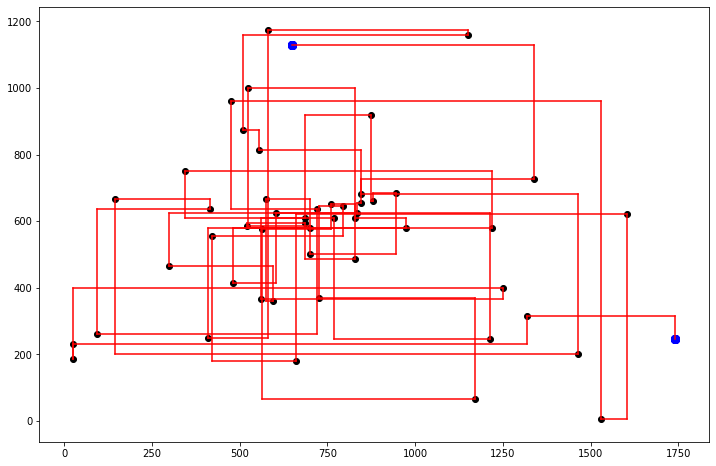

In [196]:
plot_best_path(best_route)

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [191]:
def create_route(city_list): # создаём произвольный маршрут
    route = random.sample(city_list, len(city_list))
    return route

def simulated_annealing(city_list, T0, T_min, num_iterations, alpha):
    start_route = create_route(city_list)
    best_route = start_route
    T = T0
    iteration = 0
    while T > T_min and iteration < num_iterations:
        new_route = create_route(city_list)
        delta_fitness = Fitness(new_route).route_fitness() - Fitness(best_route).route_fitness()
        if delta_fitness > 0:
            best_route = new_route
        else:
            p = np.exp(delta_fitness / T)
            c = random.uniform(0, 1)
            if c >= p:
                best_route = new_route
        iteration += 1
        T = alpha * T
    print(f'Лучшее расстояние: {1 / Fitness(best_route).route_fitness()}')
    return best_route

In [192]:
best_route = simulated_annealing(city_list, T0=4, T_min=1e-8, num_iterations=1000, alpha=0.8)

Лучшее расстояние: 32925.0


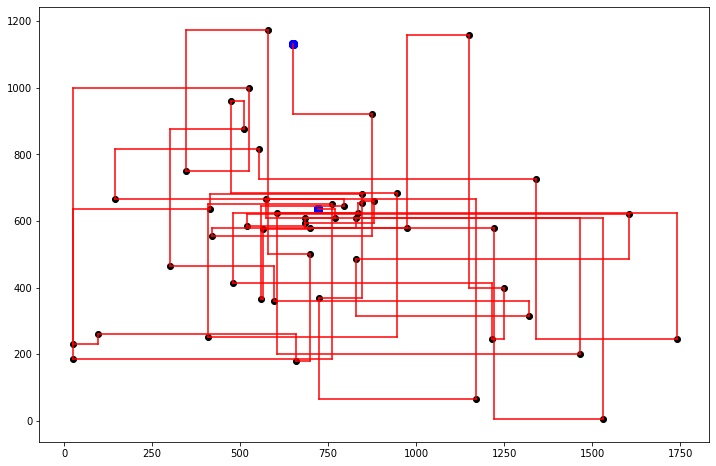

In [193]:
plot_best_path(best_route)

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [78]:
def create_route(city_list): # создаём произвольный маршрут - создание "одного индивида"
    route = random.sample(city_list, len(city_list))
    return route

def initial_population(population_size, city_list): # создаём популяцию
    population = []
    for i in range(population_size):
        population.append(create_route(city_list))
    return population

def rank_routes(population): # ранжируем маршруты популяции по величине fitness_route
    fitness_ranking = {}
    for i in range(len(population)):
        fitness_ranking[i] = Fitness(population[i]).route_fitness()
    return sorted(fitness_ranking.items(), key=operator.itemgetter(1), reverse=True)

In [79]:
def selection(pop_ranked, elite_size): # селекция
    selection_results = []
    df = pd.DataFrame(np.array(pop_ranked), columns = ['Index', 'Fitness'])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_percent'] = df.cum_sum*100 / df.Fitness.sum()
    for i in range(elite_size):
        selection_results.append(pop_ranked[i][0])
    for i in range(len(pop_ranked) - elite_size):
        pick = 100*random.random()
        for j in range(len(pop_ranked)):
            if pick <= df.iat[i, 3]:
                selection_results.append(pop_ranked[i][0])
                break
    return selection_results

def mating_pool(population, selection_results):
    mat_pool = []
    for i in range(len(selection_results)):
        index = selection_results[i]
        mat_pool.append(population[index])
    return mat_pool

In [80]:
def breed(parent1, parent2): # ищем ребёнка
    child = []
    child1 = []
    child2 = []
    gene_A = int(random.random() * len(parent1))
    gene_B = int(random.random() * len(parent2))
    start_gene = min(gene_A, gene_B)
    end_gene = max(gene_A, gene_B)
    for i in range(start_gene, end_gene):
        child1.append(parent1[i])
    child2 = [item for item in parent2 if item not in child1]
    child = child1 + child2
    return child

def population_breed(mating_pool, elite_size): # ищем детей
    children = []
    pool = random.sample(mating_pool, len(mating_pool))
    for i in range(elite_size):
        children.append(mating_pool[i])
    for i in range(len(mating_pool) - elite_size):
        child = breed(pool[i], pool[len(mating_pool) - i - 1])
        children.append(child)
    return children

In [81]:
def mutate(individual, mutation_rate): # вносим мутации - замены
    for swapped in range(len(individual)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swap_with]
            individual[swapped] = city2
            individual[swap_with] = city1
    return individual

def mutate_population(population, mutation_rate):
    mutated_pop = []
    for individ in range(len(population)):
        mutated_individ = mutate(population[individ], mutation_rate)
        mutated_pop.append(mutated_individ)
    return mutated_pop

In [82]:
def next_generation(current_generation, elite_size, mutation_rate):
    pop_ranked = rank_routes(current_generation)
    selection_results = selection(pop_ranked, elite_size)
    mat_pool = mating_pool(current_generation, selection_results)
    children = population_breed(mat_pool, elite_size)
    next_gener = mutate_population(children, mutation_rate)
    return next_gener

In [83]:
def genetic_algorithm(population, population_size, elite_size, mutation_rate, num_generations):
    pop = initial_population(population_size, population)
    progress = []
    progress.append(1 / rank_routes(pop)[0][1])
    print(f'Начальное расстояние: {1 / rank_routes(pop)[0][1]}')
    for i in range(num_generations):
        pop = next_generation(pop, elite_size, mutation_rate)
        progress.append(1 / rank_routes(pop)[0][1])
    print(f'Конечное расстояние: {1 / rank_routes(pop)[0][1]}')
    best_route_index = rank_routes(pop)[0][0]
    best_route = pop[best_route_index]
    plt.figure(figsize=(12, 8))
    plt.plot(progress)
    plt.ylabel('Расстояние')
    plt.xlabel('Поколение')
    plt.show()
    return best_route

Начальное расстояние: 29420.0
Конечное расстояние: 31410.0


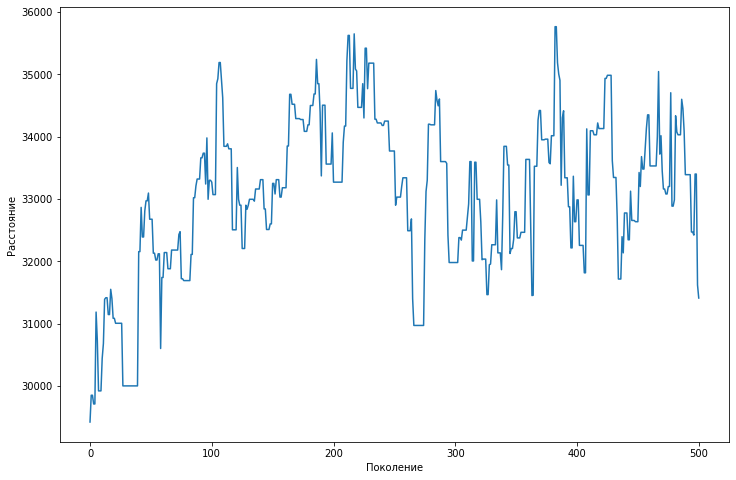

In [84]:
best_route = genetic_algorithm(population=city_list, population_size=100, elite_size=20, mutation_rate=0.01, num_generations=500)

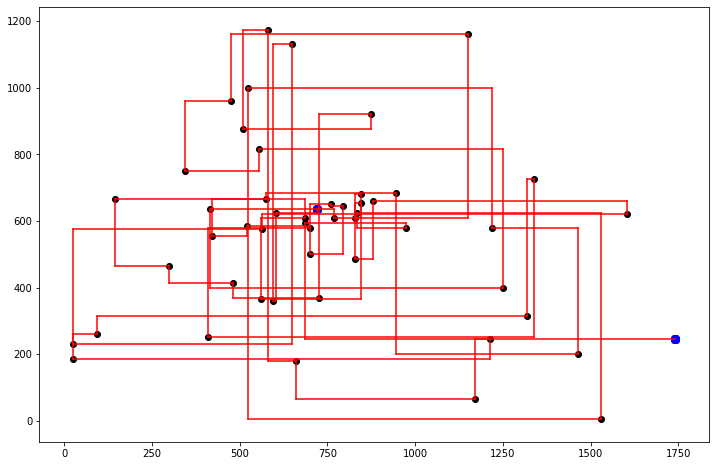

In [85]:
plot_best_path(best_route)